### This script shows the **RICE PANICLE IMAGE PROCESSING PIPELINE**.

**PIPELINE**: Binarizing -> Thinning -> Clustering -> Evaluation( All | Main Axis | High Order ).

### **Note 1**:

This script may fail if you *Run All*. The problem is described inside **Note 2** below.

In [1]:
# Import necessary module
import sys
sys.path.append('..')
from image_processor.RicePanicle import RicePanicle
import cv2
import numpy as np
import matplotlib.pyplot as plt

# **THINNING**

In [2]:
# THINNING requires a Binary image.
binary_path = "../../crack_segmentation/transfer-learning-results/run_2/DEEPCRACK/13_2_1_1_1_DSC01478.png"
binary_img = cv2.imread(binary_path, cv2.IMREAD_GRAYSCALE)

In [3]:
skeleton_img = RicePanicle.Thinning.zhang_suen(binary_img)

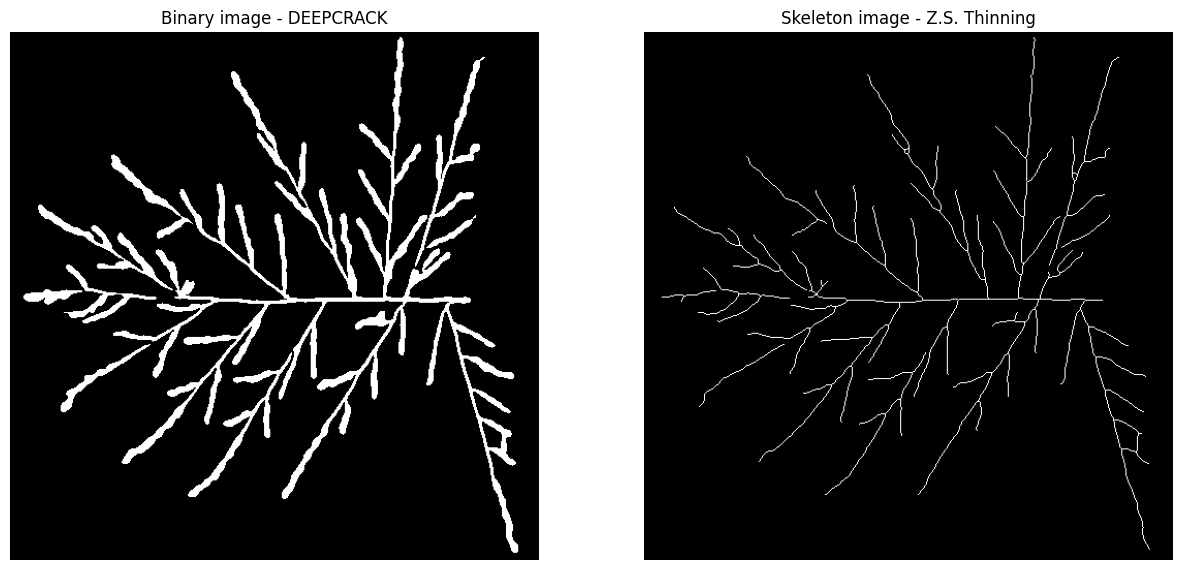

In [4]:
# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.imshow(binary_img, cmap='gray')
ax1.axis('off')
ax1.set_title("Binary image - DEEPCRACK")

ax2.imshow(skeleton_img, cmap='gray')
ax2.axis('off')
ax2.set_title("Skeleton image - Z.S. Thinning")

plt.show()

# **CLUSTERING**

In [5]:
# CLUSTERING requires a skeleton image. 
junction_img, y_pred = RicePanicle.Clustering.crossing_number(skeleton_img, return_pred_=True)

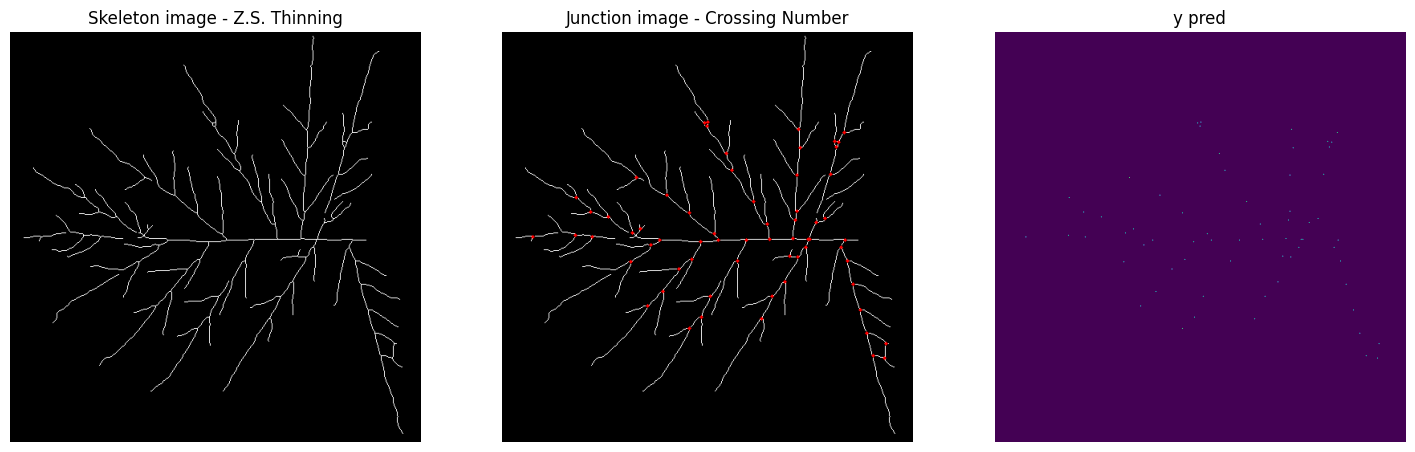

In [6]:
# Visualization
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

ax1.imshow(skeleton_img, cmap='gray')
ax1.axis('off')
ax1.set_title("Skeleton image - Z.S. Thinning")

ax2.imshow(junction_img, cmap='gray')
ax2.axis('off')
ax2.set_title("Junction image - Crossing Number")

ax3.imshow(y_pred, cmap='viridis')  # As grayscale image makes it hard to see
ax3.axis('off')
ax3.set_title("y pred")

plt.show()

# **EVALUATION**

## ALL

### **Note 2**:

- If the code below raises an error *ModuleNotFoundError* -> go to [this file](../utils/evaluation_image_generating.py) and change the import lime like this:
- `from ricepr_manipulate import resize_junction` -> `from .ricepr_manipulate import resize_junction`.
- If you have a better way of resolving this issue, please contribute.

In [7]:
# EVALUATION requires y_true ---(needs generating)---> true junction and y_pred ----(already have)----> predicted junction
from utils.ricepr_manipulate import resize_junction
from utils.evaluation_image_generating import generate_y_true

ricepr_path = "../../data/original_ricepr/O. sativa/13_2_1_1_1_DSC01478.ricepr"

In [8]:
# We have to convert in to the size of (512, 512) for consistency
junction_resized = resize_junction(ricepr_path)

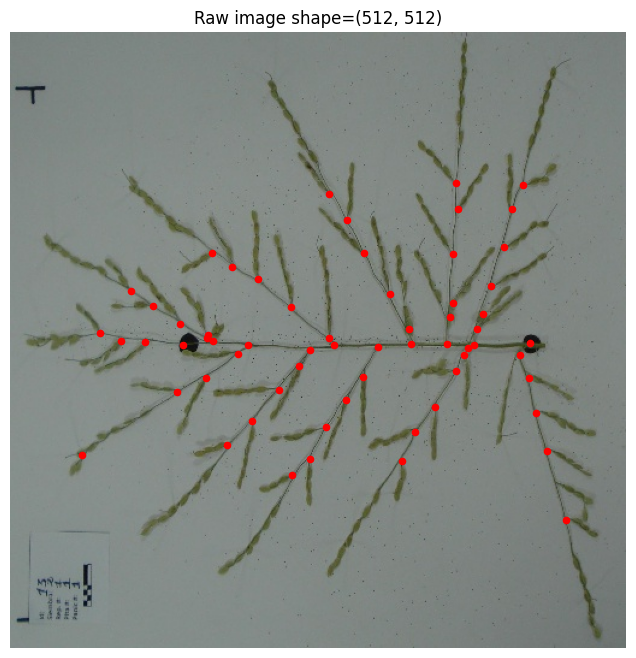

In [9]:
# Visualization
x_ = []
y_ = []
for key in junction_resized:
    for x, y in junction_resized[key]:
        x_.append(x)
        y_.append(y)
        
raw_img_512 = plt.imread("../../images/raw_images_512/O. sativa/13_2_1_1_1_DSC01478.jpg")
plt.figure(figsize=(8, 8))
plt.imshow(raw_img_512)
plt.scatter(x_, y_, s=20, c='r')
plt.axis('off')
plt.title("Raw image shape=(512, 512)")
plt.show()

In [10]:
y_true = generate_y_true(junction_resized)

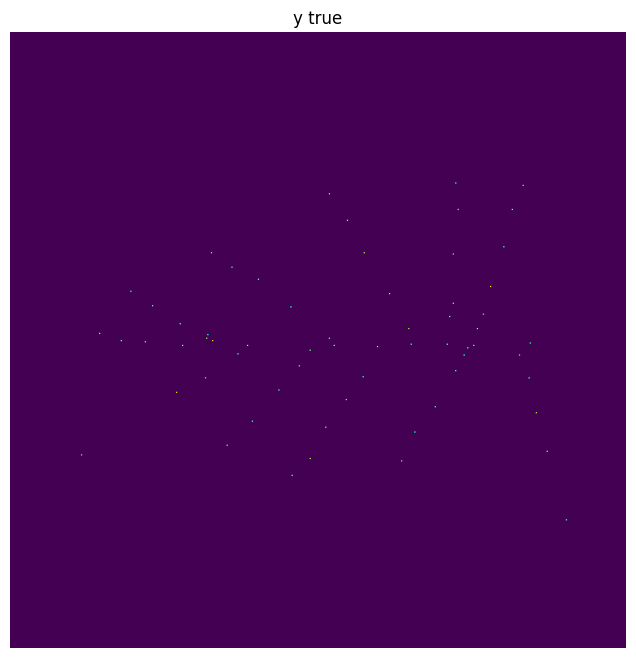

In [11]:
plt.figure(figsize=(8, 8))
plt.imshow(y_true, cmap='viridis')
plt.axis('off')
plt.title("y true")
plt.show()

In [12]:
# Every level of junctions
f1, pr, rc = RicePanicle.Evaluation.f1_score(y_true, y_pred, _return_metrics=True)
print(f"f1: {f1}, precision: {pr}, recall: {rc}")

f1: 0.6299212598425197, precision: 0.625, recall: 0.6349206349206349


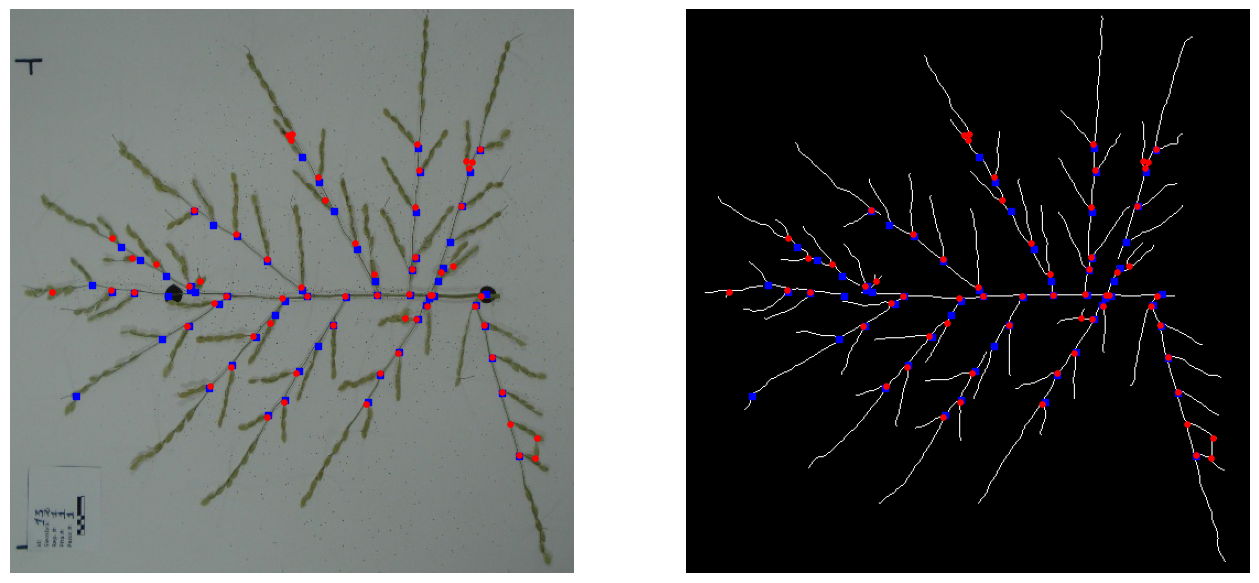

In [13]:
# Visualization
white_px_true = np.argwhere(y_true > 0)
white_px_pred = np.argwhere(y_pred > 0)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.imshow(raw_img_512, cmap='gray')
ax1.scatter(white_px_true[:, 1], white_px_true[:, 0], s=14, c='b', marker='s')
ax1.scatter(white_px_pred[:, 1], white_px_pred[:, 0], s=14, c='r', marker='o')
ax1.axis('off')

ax2.imshow(skeleton_img, cmap='gray')
ax2.scatter(white_px_true[:, 1], white_px_true[:, 0], s=14, c='b', marker='s')
ax2.scatter(white_px_pred[:, 1], white_px_pred[:, 0], s=14, c='r', marker='o')
ax2.axis('off')

plt.show()

## MAIN AXIS

In [14]:
# Main axis junctions (A new pipeline starts)
from utils.evaluation_image_generating import generate_skeleton_main_axis

# Generate y_true for main axis
y_true_main_axis = generate_y_true(junction_resized, main_axis=True)

# Generate skeleton for main axis -> Generate y_pred for main axis
skeleton_main_axis = generate_skeleton_main_axis(skeleton_img, ricepr_path)


==========POST-PROCESSING METHOD: <PRUNING_6>==========


In [15]:
# Clustering to create y_pred
junction_img_main_axis, y_pred_main_axis = RicePanicle.Clustering.crossing_number(skeleton_main_axis, return_pred_=True)

In [16]:
# Evaluating
f1, pr, rc = RicePanicle.Evaluation.f1_score(y_true_main_axis, y_pred_main_axis, _return_metrics=True)
print(f"f1: {f1}, precision: {pr}, recall: {rc}")

f1: 0.7999999999999999, precision: 0.8888888888888888, recall: 0.7272727272727273


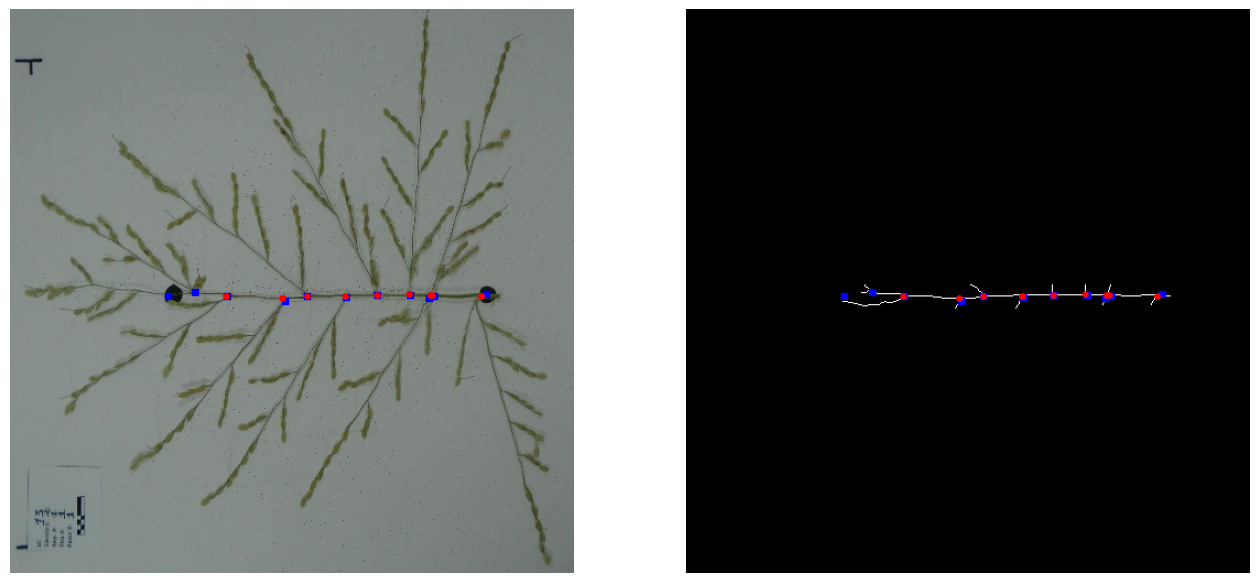

In [17]:
# Visualization
white_px_true_main_axis = np.argwhere(y_true_main_axis > 0)
white_px_pred_main_axis = np.argwhere(y_pred_main_axis > 0)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.imshow(raw_img_512, cmap='gray')
ax1.scatter(white_px_true_main_axis[:, 1], white_px_true_main_axis[:, 0], s=14, c='b', marker='s')
ax1.scatter(white_px_pred_main_axis[:, 1], white_px_pred_main_axis[:, 0], s=14, c='r', marker='o')
ax1.axis('off')

ax2.imshow(skeleton_main_axis, cmap='gray')
ax2.scatter(white_px_true_main_axis[:, 1], white_px_true_main_axis[:, 0], s=14, c='b', marker='s')
ax2.scatter(white_px_pred_main_axis[:, 1], white_px_pred_main_axis[:, 0], s=14, c='r', marker='o')
ax2.axis('off')

plt.show()

## HIGH ORDER

In [18]:
# High-order junctions (A new pipeline starts) 
from utils.evaluation_image_generating import generate_skeleton_high_order

# Generate y_true for main axis
y_true_high_order = generate_y_true(junction_resized, high_order=True)

# Generate skeleton for main axis -> Generate y_pred for main axis
skeleton_high_order = generate_skeleton_high_order(skeleton_img, ricepr_path)

==========POST-PROCESSING METHOD: <PRUNING_10>==========


In [19]:
# Clustering to create y_pred
junction_img_high_order, y_pred_high_order = RicePanicle.Clustering.crossing_number(skeleton_high_order, return_pred_=True)

In [20]:
# Evaluating
f1, pr, rc = RicePanicle.Evaluation.f1_score(y_true_high_order, y_pred_high_order, _return_metrics=True)
print(f"f1: {f1}, precision: {pr}, recall: {rc}")

f1: 0.5684210526315789, precision: 0.627906976744186, recall: 0.5192307692307693


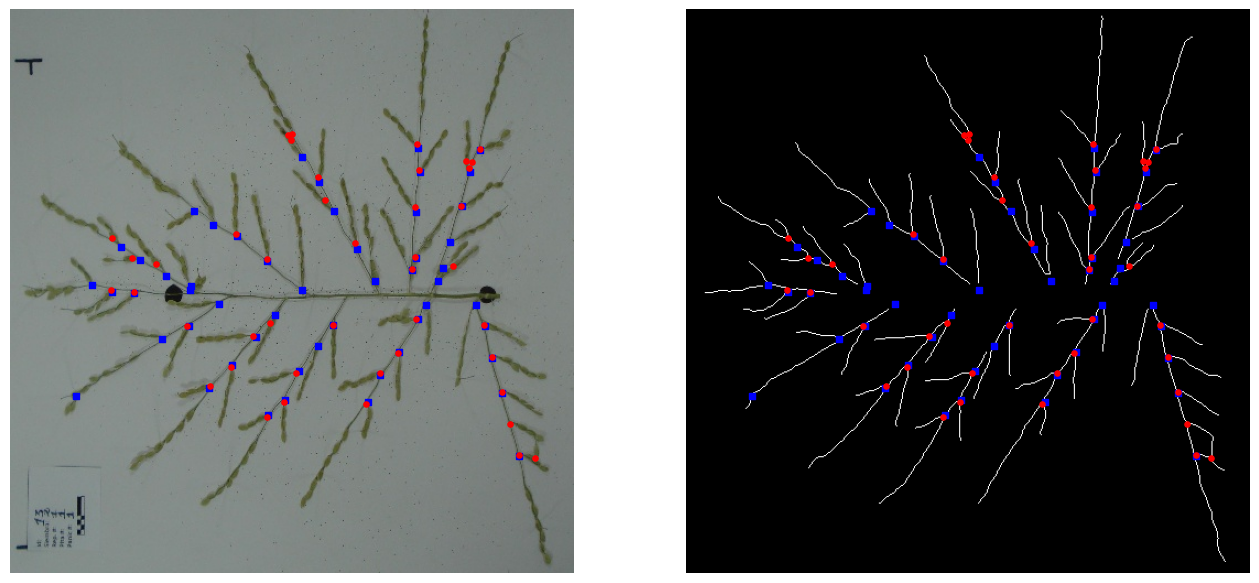

In [21]:
# Visualization
white_px_true_high_order = np.argwhere(y_true_high_order > 0)
white_px_pred_high_order = np.argwhere(y_pred_high_order > 0)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.imshow(raw_img_512, cmap='gray')
ax1.scatter(white_px_true_high_order[:, 1], white_px_true_high_order[:, 0], s=14, c='b', marker='s')
ax1.scatter(white_px_pred_high_order[:, 1], white_px_pred_high_order[:, 0], s=14, c='r', marker='o')
ax1.axis('off')

ax2.imshow(skeleton_high_order, cmap='gray')
ax2.scatter(white_px_true_high_order[:, 1], white_px_true_high_order[:, 0], s=14, c='b', marker='s')
ax2.scatter(white_px_pred_high_order[:, 1], white_px_pred_high_order[:, 0], s=14, c='r', marker='o')
ax2.axis('off')

plt.show()